# Task 1: Understanding the data and EDA

Import neccessary libraries and modules

In [51]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessor import DataPreprocessor  

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set figure size
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

**Data Collection**

- Download the brent oil price data

In [30]:
# Set google drive url for loading the dataset
url = 'https://drive.google.com/file/d/1dJfhjX57bjvFnc1HHYVUhyW939QjIQE5/view?usp=drive_link'

# Setup the data preprocessor class
processor = DataPreprocessor(url, logger=logger)
# Load the data
price_data = processor.load_data()

Downloading...
From: https://drive.google.com/uc?export=download&id=1dJfhjX57bjvFnc1HHYVUhyW939QjIQE5
To: /home/noh/10Academy/oil-price-statistical-modeling/data/data.csv
100%|██████████| 156k/156k [00:00<00:00, 276kB/s]
/home/noh/10Academy/oil-price-statistical-modeling/scripts/data_preprocessor.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['Date'] = pd.to_datetime(self.data['Date'].str.strip(),  errors='coerce')


**Note**: always check `logs/notebooks.log` file for any log messages

In [13]:
# Explore the first 10 rows
price_data.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [14]:
# Explore the last 10 rows
price_data.tail(10)

,Date,Price
9001,2022-11-01,95.12
9002,2022-11-02,96.07
9003,2022-11-03,95.29
9004,2022-11-04,99.53
9005,2022-11-07,99.87
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37
9010,2022-11-14,93.59


Create event dataset collected from various sources

In [31]:
# Define the events dictionary
events_dict = {
    "Gulf War (1990-1991)": {"start": "1990-08-02", "end": "1991-02-28"},
    "September 11 Attacks (2001)": {"start": "2001-09-11", "end": "2001-09-11"},
    "2003 Invasion of Iraq": {"start": "2003-03-20", "end": "2011-12-18"},
    "2008 Financial Crisis": {"start": "2008-09-15", "end": "2009-07-01"},
    "Arab Spring (2010-2012)": {"start": "2010-12-18", "end": "2012-12-18"},
    "Libyan Civil War (2011)": {"start": "2011-02-15", "end": "2011-10-23"},
    "U.S. Shale Oil Boom (2010s)": {"start": "2010-01-01", "end": "2019-12-31"},
    "OPEC Production Cuts (2016-2017)": {"start": "2016-11-30", "end": "2017-06-30"},
    "Iran Nuclear Deal and Sanctions (2015-2018)": {"start": "2015-07-14", "end": "2018-05-07"},
    "COVID-19 Pandemic (2020)": {"start": "2020-03-11", "end": "2022-09-30"},
    "OPEC+ Response to COVID-19 (2020)": {"start": "2020-04-09", "end": "2020-12-31"},
    "Russia-Ukraine Conflict (2022)": {"start": "2022-02-24", "end": "2022-09-30"},
    "Global Economic Recovery (2021-2022)": {"start": "2021-01-01", "end": "2022-09-30"}
}

# Convert the events dictionary to a DataFrame
events_data = pd.DataFrame.from_dict(events_dict, orient='index')
events_data.reset_index(inplace=True)
events_data.columns = ['Event', 'Start', 'End']

# Convert Start and End to datetime
events_data['Start'] = pd.to_datetime(events_data['Start'])
events_data['End'] = pd.to_datetime(events_data['End'])


In [5]:
events_data

,Event,Start,End
0,Gulf War (1990-1991),1990-08-02,1991-02-28
1,September 11 Attacks (2001),2001-09-11,2001-09-11
2,2003 Invasion of Iraq,2003-03-20,2011-12-18
3,2008 Financial Crisis,2008-09-15,2009-07-01
4,Arab Spring (2010-2012),2010-12-18,2012-12-18
5,Libyan Civil War (2011),2011-02-15,2011-10-23
6,U.S. Shale Oil Boom (2010s),2010-01-01,2019-12-31
7,OPEC Production Cuts (2016-2017),2016-11-30,2017-06-30
8,Iran Nuclear Deal and Sanctions (2015-2018),2015-07-14,2018-05-07
9,COVID-19 Pandemic (2020),2020-03-11,2022-09-30


Combine the price data with event data

In [36]:
# Create a function to check if the date falls within any event
def assign_event(date):
    for _, row in events_data.iterrows():
        if row['Start'] <= date <= row['End']:
            return row['Event']
        
    return 'No Event'

# Apply the function to assign events to each price date
# Convert Date to start
price_data['Event'] = price_data['Date'].apply(assign_event)


In [37]:

# Now price_data contains the original price data along with the corresponding events
price_data.head(10)  # View the combined data


,Date,Price,Event
0,1987-05-20,18.63,No Event
1,1987-05-21,18.45,No Event
2,1987-05-22,18.55,No Event
3,1987-05-25,18.60,No Event
4,1987-05-26,18.63,No Event
5,1987-05-27,18.60,No Event
6,1987-05-28,18.60,No Event
7,1987-05-29,18.58,No Event
8,1987-06-01,18.65,No Event
9,1987-06-02,18.68,No Event


In [38]:
price_data.iloc[8011:8021]

,Date,Price,Event
8011,2018-12-07,61.71,U.S. Shale Oil Boom (2010s)
8012,2018-12-10,60.29,U.S. Shale Oil Boom (2010s)
8013,2018-12-11,59.73,U.S. Shale Oil Boom (2010s)
8014,2018-12-12,59.94,U.S. Shale Oil Boom (2010s)
8015,2018-12-13,59.03,U.S. Shale Oil Boom (2010s)
8016,2018-12-14,58.56,U.S. Shale Oil Boom (2010s)
8017,2018-12-17,57.59,U.S. Shale Oil Boom (2010s)
8018,2018-12-18,55.26,U.S. Shale Oil Boom (2010s)
8019,2018-12-19,55.60,U.S. Shale Oil Boom (2010s)
8020,2018-12-20,52.84,U.S. Shale Oil Boom (2010s)


### Data Cleaning and Preprocessing

Inspect the dataset for completeness and structure

In [39]:
processor.inspect(price_data)

Dimensions (rows, columns): (9011, 3)

Data Types:
Date     datetime64[ns]
Price           float64
Event            object
dtype: object

No missing values found.

Unique Values in Each Column:
Date     9011
Price    5015
Event       7
dtype: int64
Number of duplicate rows: 0

Summary Statistics for Numeric Columns:


,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


**Detect Outliers**

- Box plot

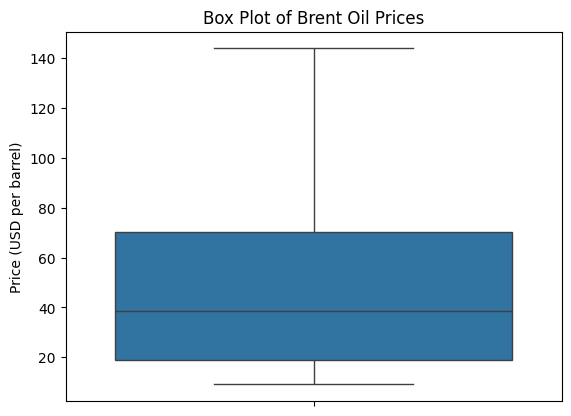

In [52]:
# Assuming 'price_data' is your DataFrame containing the 'Price' column
sns.boxplot(data=price_data, y='Price')
plt.title('Box Plot of Brent Oil Prices')
plt.ylabel('Price (USD per barrel)')
plt.show()

- No outliers detected in the price data

Scatter Plot
- Understand the outliers of the price data

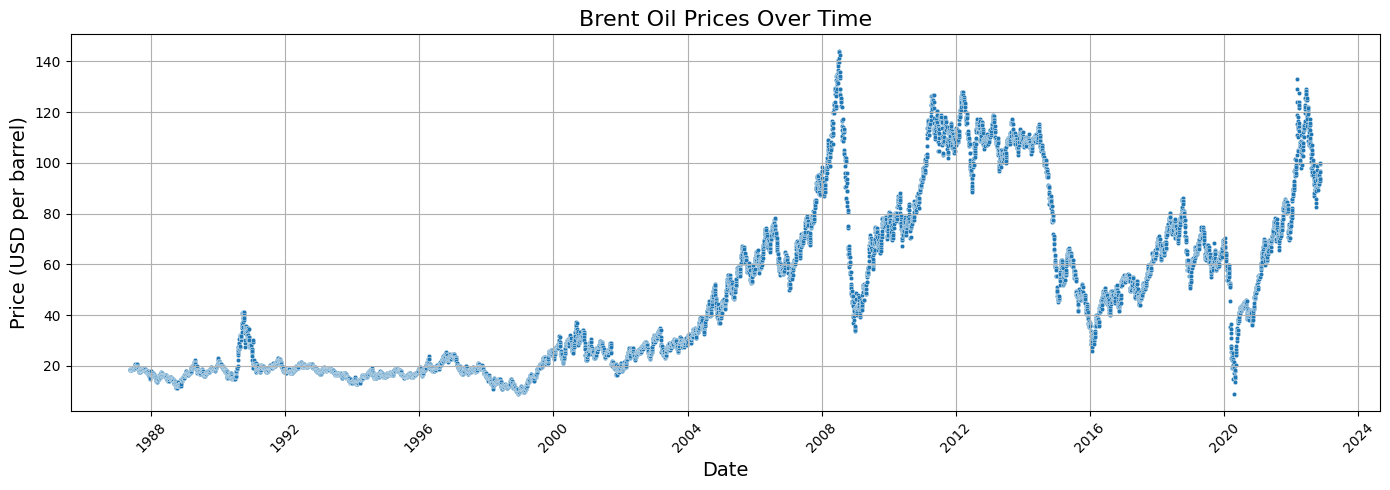

In [54]:
# Assuming price_data is your DataFrame with 'Date' and 'Price' columns
plt.figure(figsize=(14, 5))
sns.scatterplot(data=price_data, x='Date', y='Price', marker='o', s=10)

# Customize the plot
plt.title('Brent Oil Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD per barrel)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### Exploratory Data Analysis

- Descriptive Statistics

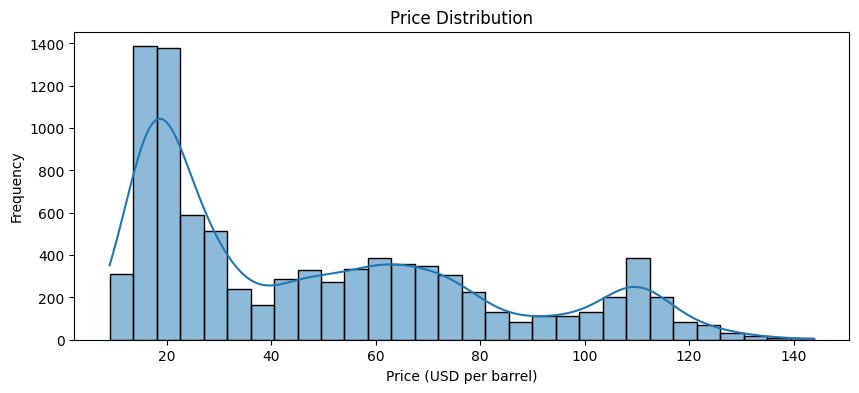

In [55]:
# Visualize the price distribution
plt.figure(figsize=(10, 4))
sns.histplot(price_data['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD per barrel)')
plt.ylabel('Frequency')
plt.show()


Plot Time Series Data:

- Create a line graph to visualize price trends over time.

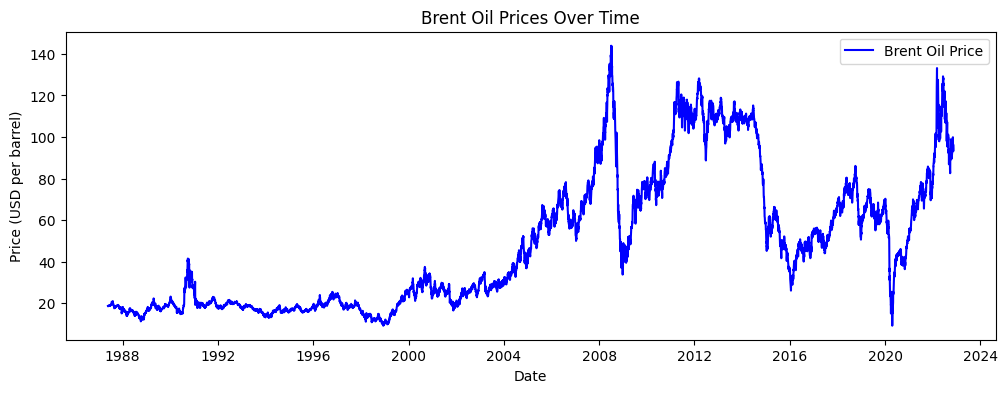

In [59]:
plt.figure(figsize=(12, 4))
plt.plot(price_data['Date'], price_data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
# plt.axvline(x='Date', color='red', linestyle='--', label='Event Marker')
plt.legend()
plt.show()
